**Importing Required Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Dataset**

In [3]:
terrorism_data = pd.read_csv('terroristdata.csv')

**Feature Engineering**

In [4]:
terrorism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   region_txt       181691 non-null  object 
 2   nkill            171378 non-null  float64
 3   nwound           165380 non-null  float64
 4   attacktype1_txt  181691 non-null  object 
 5   longitude        177134 non-null  float64
 6   latitude         177135 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 9.7+ MB


In [5]:
column_names = terrorism_data.columns.tolist()

# Print the column names
print(column_names)

['iyear', 'region_txt', 'nkill', 'nwound', 'attacktype1_txt', 'longitude', 'latitude']


In [6]:
terrorism_data.head()

,iyear,region_txt,nkill,nwound,attacktype1_txt,longitude,latitude
0,1970,Central America & Caribbean,1.0,0.0,Assassination,-69.951164,18.456792
1,1970,North America,0.0,0.0,Hostage Taking (Kidnapping),-99.086624,19.371887
2,1970,Southeast Asia,1.0,0.0,Assassination,120.599741,15.478598
3,1970,Western Europe,NaN,NaN,Bombing/Explosion,23.762728,37.997490
4,1970,East Asia,NaN,NaN,Facility/Infrastructure Attack,130.396361,33.580412


In [7]:
# Check for missing variables
terrorism_data.isnull().any()

iyear              False
region_txt         False
nkill               True
nwound              True
attacktype1_txt    False
longitude           True
latitude            True
dtype: bool

In [8]:
terrorism_data.dropna(subset=['nkill', 'nwound'], inplace=True)

In [9]:
terrorism_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164817 entries, 0 to 181690
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            164817 non-null  int64  
 1   region_txt       164817 non-null  object 
 2   nkill            164817 non-null  float64
 3   nwound           164817 non-null  float64
 4   attacktype1_txt  164817 non-null  object 
 5   longitude        160916 non-null  float64
 6   latitude         160917 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 10.1+ MB


In [10]:
terrorism_data.drop_duplicates(inplace=True)

In [11]:
terrorism_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117769 entries, 0 to 181688
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            117769 non-null  int64  
 1   region_txt       117769 non-null  object 
 2   nkill            117769 non-null  float64
 3   nwound           117769 non-null  float64
 4   attacktype1_txt  117769 non-null  object 
 5   longitude        115401 non-null  float64
 6   latitude         115402 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 7.2+ MB


**Data Exploration**

In [12]:
# To Generate summary statistics
summary_stats = terrorism_data.describe()
print(summary_stats)

               iyear          nkill         nwound     longitude  \
count  117769.000000  117769.000000  117769.000000  1.154010e+05   
mean     2004.091484       2.768411       4.056033 -7.120794e+02   
std        12.349657      11.488427      42.496903  2.537065e+05   
min      1970.000000       0.000000       0.000000 -8.618590e+07   
25%      1992.000000       0.000000       0.000000  1.248903e+01   
50%      2010.000000       1.000000       0.000000  4.423236e+01   
75%      2014.000000       2.000000       3.000000  7.115201e+01   
max      2017.000000    1384.000000    8191.000000  1.793667e+02   

            latitude  
count  115402.000000  
mean       23.683098  
std        17.415834  
min       -53.154613  
25%        11.134930  
50%        31.224020  
75%        34.547805  
max        74.633553  


**Explore categorical variables**

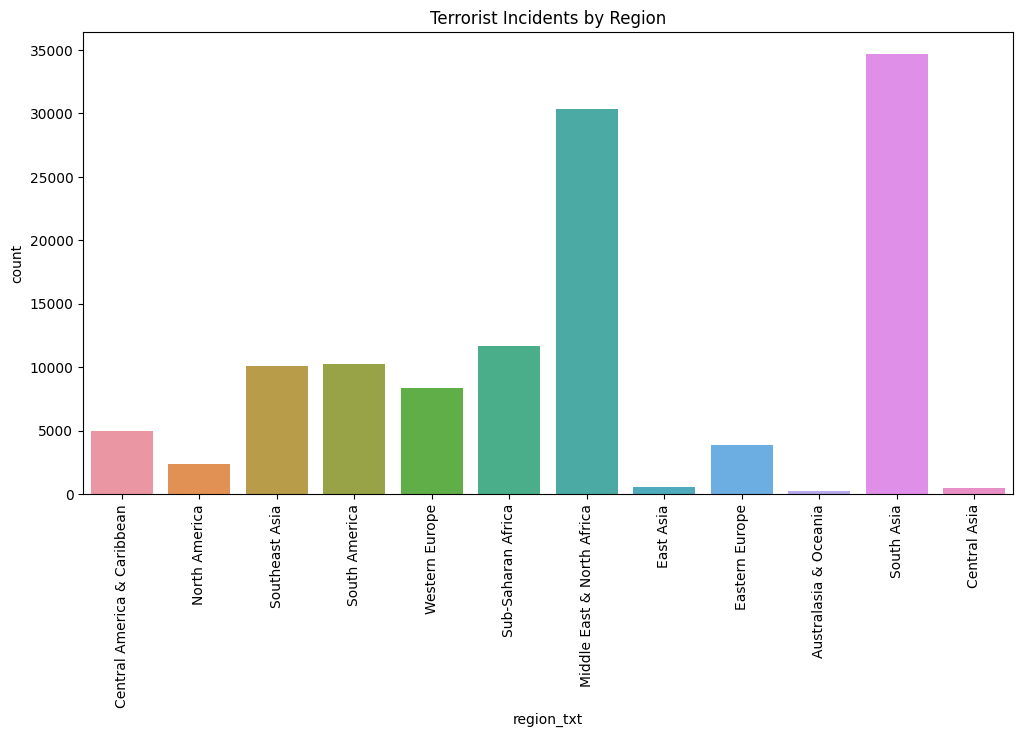

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=terrorism_data, x='region_txt')
plt.title('Terrorist Incidents by Region')
plt.xticks(rotation=90)
plt.show()

**Temporal Analysis**

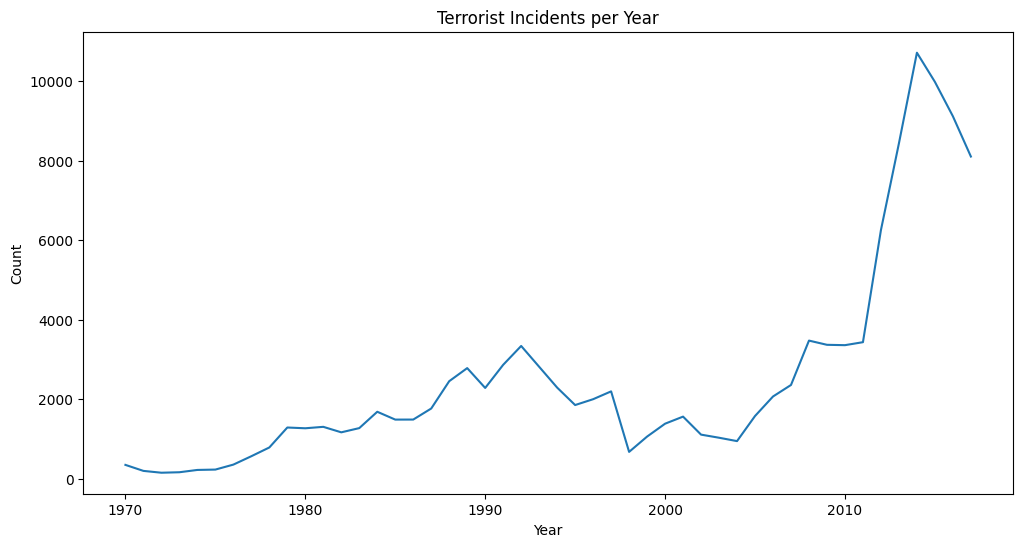

In [14]:
# Create a time series plot
plt.figure(figsize=(12, 6))
terrorism_data['iyear'].value_counts().sort_index().plot(kind='line')
plt.title('Terrorist Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**Geospatial Analysis**

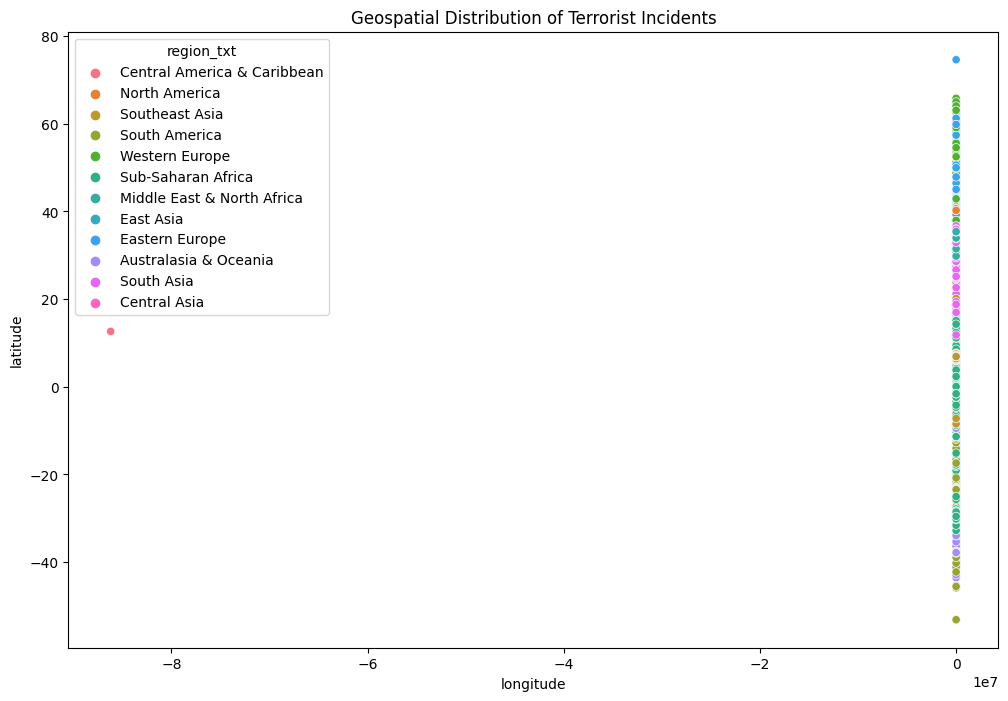

In [15]:
 # Create a geospatial plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=terrorism_data, x='longitude', y='latitude', hue='region_txt', legend='full')
plt.title('Geospatial Distribution of Terrorist Incidents')
plt.show()

**Attack Type Analysis**

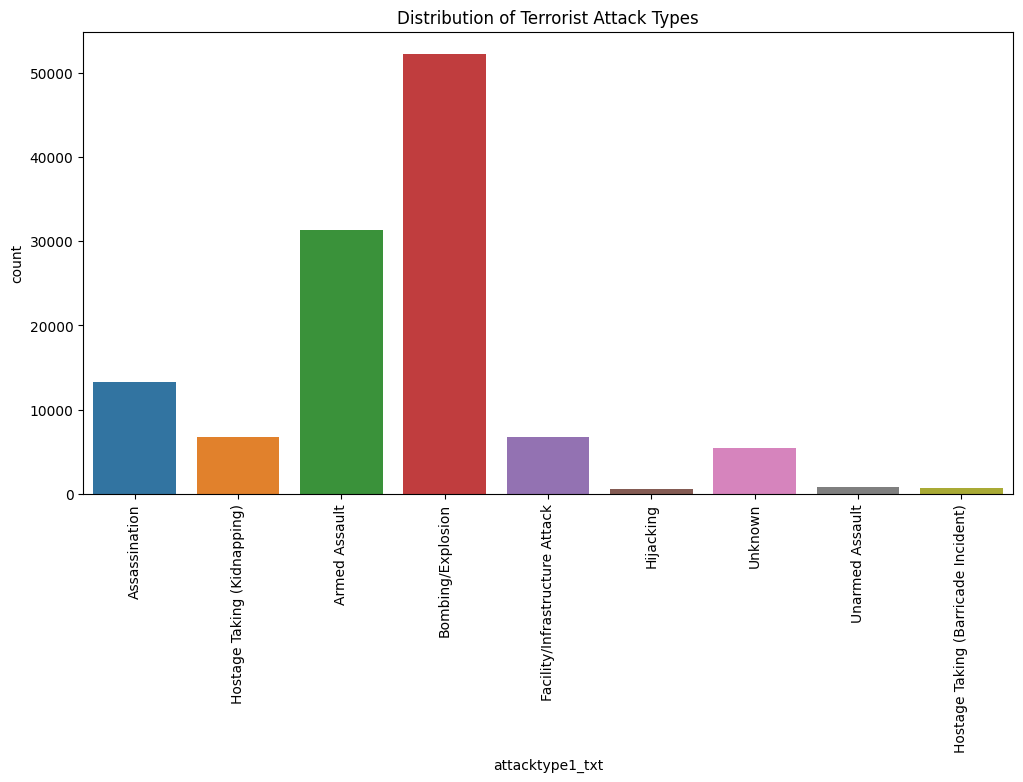

In [16]:
# Create a bar plot of attack types
plt.figure(figsize=(12, 6))
sns.countplot(data=terrorism_data, x='attacktype1_txt')
plt.title('Distribution of Terrorist Attack Types')
plt.xticks(rotation=90)
plt.show()